The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/jeromejeannin/Library/CloudStorage/GoogleDrive-jeromemjeannin@gmail.com/My Drive/Master Thesis/OceanPlatformControl


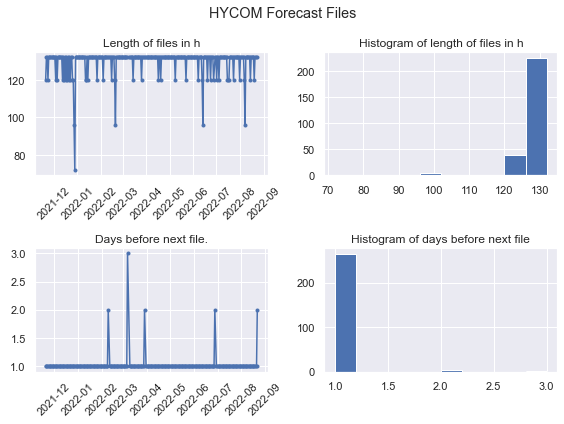

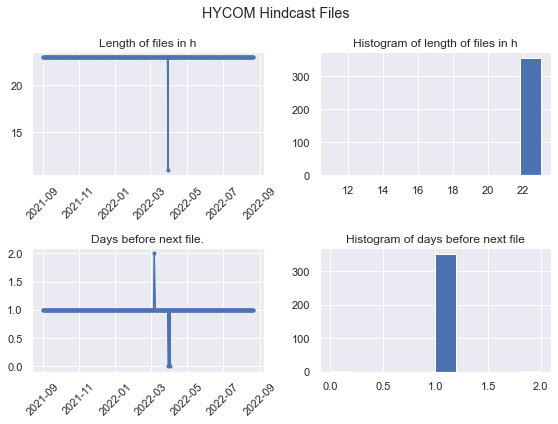

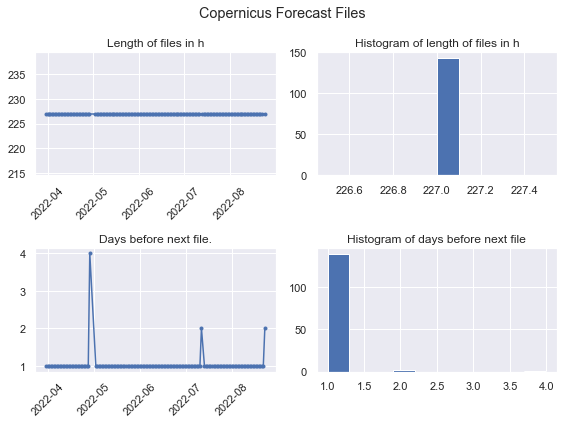

In [3]:
%load_ext autoreload
%autoreload 2
%cd '/Users/jeromejeannin/Library/CloudStorage/GoogleDrive-jeromemjeannin@gmail.com/My Drive/Master Thesis/OceanPlatformControl'
%pwd

from ocean_navigation_simulator.environment.ArenaFactory import ArenaFactory

def plot_files(title, files):
    if files.count > 0:
        dates = [file.subsetOptions.timeRange.start for file in files.objs]
        length = [(file.subsetOptions.timeRange.end - file.subsetOptions.timeRange.start).total_seconds() // 3600 for file in files.objs]
        deltas = [(file.subsetOptions.timeRange.start-files.objs[index-1].subsetOptions.timeRange.start).total_seconds() / 3600 / 24  for index, file in enumerate(files.objs) if index>0]

        import matplotlib.pyplot as plt
        import seaborn as sns
        sns.set_theme()
        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
        fig.suptitle(title)

        axs[0, 0].plot(dates, length, marker='.')
        axs[0, 0].set_title('Length of files in h')
        axs[0, 0].tick_params(axis='x', labelrotation = 45)
        axs[0, 1].hist(length)
        axs[0, 1].set_title('Histogram of length of files in h')

        axs[1, 0].plot(dates[:-1], deltas, marker='.')
        axs[1, 0].set_title('Days before next file.')
        axs[1, 0].tick_params(axis='x', labelrotation = 45)
        axs[1, 1].hist(deltas)
        axs[1, 1].set_title('Histogram of days before next file')

        fig.tight_layout()
        plt.show()

plot_files('HYCOM Forecast Files', ArenaFactory.get_filelist(archive_source='HYCOM', archive_type='forecast'))
plot_files('HYCOM Hindcast Files', ArenaFactory.get_filelist(archive_source='HYCOM', archive_type='hindcast'))
plot_files('Copernicus Forecast Files', ArenaFactory.get_filelist(archive_source='Copernicus', archive_type='forecast'))
plot_files('Copernicus Hindcast Files', ArenaFactory.get_filelist(archive_source='Copernicus', archive_type='hindcast'))

In [11]:
import pandas as pd
validation_missions = pd.read_csv('../../../data/missions/validation/all.csv')
dates = validation_missions['t_0']

from collections import Counter
counter = list(Counter(dates).items())

for pair in counter:
    print(f"{pair[0]}: {pair[1]}")

2021-11-20 12:10:00+00:00: 64
2021-11-24 12:10:00+00:00: 64
2021-11-30 12:10:00+00:00: 64
2021-12-02 12:10:00+00:00: 64
2021-12-04 12:10:00+00:00: 64
2021-12-10 12:10:00+00:00: 63
2021-12-14 12:10:00+00:00: 63
2021-12-18 12:10:00+00:00: 64
2021-12-22 12:10:00+00:00: 63
2021-12-25 12:10:00+00:00: 64
2022-01-02 12:10:00+00:00: 64
2022-01-04 12:10:00+00:00: 64
2022-01-07 12:10:00+00:00: 64
2022-01-11 12:10:00+00:00: 64
2022-01-15 12:10:00+00:00: 63
2022-01-19 12:10:00+00:00: 64
2022-01-23 12:10:00+00:00: 63
2022-01-27 12:10:00+00:00: 64
